<div style="text-align: right"> <b>데이터분석과기계학습 프로젝트(연이삭)</b></div>

---

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
vehicle = pd.read_csv('/Users/isc-yeon/Documents/projectData/Vehicle_Registration_Transactions_by_Department_of_Licensing.csv',
                      nrows=10_000,
                      # usecols = [3,11],
                      low_memory=False)

vehicle.head(5)

,Transaction Month and Year,Make,Model,Model Year,Vehicle Color,Vehicle Type,Vehicle Primary Use,Fuel Type Primary,Gross Vehicle Weight Rating Class,Gross Vehicle Weight Rating Range (lbs),...,Plate Configuration,Owner Type,County,State,Postal Code,Transaction Type,Transaction Channel,Payment Type,2020 Census Tract,Transaction Count
0,January 2022,HONDA,INSIGHT,2019,NaN,PASSENGER CAR,Passenger,Gasoline,NaN,NaN,...,Standard,Individual Owner,Pierce,WA,98374,Registration Renewal,Online,Debit/Credit Card,73123.0,1
1,January 2022,MERCEDES-BENZ,GLK-CLASS,2014,WHITE,MULTIPURPOSE PASSENGER VEHICLE (MPV),Passenger,Gasoline,1D,"5,001 - 6,000",...,Standard,Individual Owner,King,WA,98178,Registration Renewal,Online,Bank Transfer,26101.0,1
2,January 2022,MERCEDES-BENZ,M-CLASS,2002,BLUE,MULTIPURPOSE PASSENGER VEHICLE (MPV),Passenger,Gasoline,2E,"6,001 - 7,000",...,Standard,Individual Owner,Snohomish,WA,98258,Registration Renewal,Online,Bank Transfer,52506.0,1
3,January 2022,MERCEDES-BENZ,R-CLASS,2008,WHITE,MULTIPURPOSE PASSENGER VEHICLE (MPV),Passenger,Diesel,2E,"6,001 - 7,000",...,Standard,Individual Owner,Okanogan,WA,98862,Registration Renewal,Online,Debit/Credit Card,970900.0,1
4,January 2022,MERCURY,MOUNTAINEER,1997,GREEN,MULTIPURPOSE PASSENGER VEHICLE (MPV),Passenger,Gasoline,1D,"5,001 - 6,000",...,Standard,Individual Owner,King,WA,98034,Registration Renewal,Online,Debit/Credit Card,22300.0,1


In [3]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Transaction Month and Year               10000 non-null  object 
 1   Make                                     10000 non-null  object 
 2   Model                                    10000 non-null  object 
 3   Model Year                               10000 non-null  int64  
 4   Vehicle Color                            6112 non-null   object 
 5   Vehicle Type                             10000 non-null  object 
 6   Vehicle Primary Use                      10000 non-null  object 
 7   Fuel Type Primary                        10000 non-null  object 
 8   Gross Vehicle Weight Rating Class        6984 non-null   object 
 9   Gross Vehicle Weight Rating Range (lbs)  6984 non-null   object 
 10  Fuel Type Secondary                      789 no

In [4]:
vehicle = pd.read_csv('/Users/isc-yeon/Documents/projectData/Vehicle_Registration_Transactions_by_Department_of_Licensing.csv',
                      # nrows=10_000,
                      usecols = [3,11],
                      low_memory=False)

vehicle

,Model Year,Electrification Level
0,2019,Strong HEV (Hybrid Electric Vehicle)
1,2014,ICE (Internal Combustion Engine)
2,2002,ICE (Internal Combustion Engine)
3,2008,ICE (Internal Combustion Engine)
4,1997,ICE (Internal Combustion Engine)
...,...,...
18284632,2020,ICE (Internal Combustion Engine)
18284633,2005,ICE (Internal Combustion Engine)
18284634,2016,ICE (Internal Combustion Engine)
18284635,2011,ICE (Internal Combustion Engine)


In [5]:
vehicle.index

RangeIndex(start=0, stop=18284637, step=1)

In [6]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18284637 entries, 0 to 18284636
Data columns (total 2 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   Model Year             int64 
 1   Electrification Level  object
dtypes: int64(1), object(1)
memory usage: 279.0+ MB


In [7]:
vehicle.loc[:, 'Electrification Level'].value_counts()

ICE (Internal Combustion Engine)                 17400468
Strong HEV (Hybrid Electric Vehicle)               383784
HEV (Hybrid Electric Vehicle) - Level Unknown      245297
BEV (Battery Electric Vehicle)                     177228
PHEV (Plug-in Hybrid Electric Vehicle)              61673
Mild HEV (Hybrid Electric Vehicle)                  16186
Name: Electrification Level, dtype: int64

In [8]:
vehicle.loc[:, 'Electrification Level'].nunique()

6

In [9]:
vehicle.loc[:, 'Electrification Level'].isna().sum()

1

In [10]:
vehicle = vehicle.dropna()

In [11]:
vehicle

,Model Year,Electrification Level
0,2019,Strong HEV (Hybrid Electric Vehicle)
1,2014,ICE (Internal Combustion Engine)
2,2002,ICE (Internal Combustion Engine)
3,2008,ICE (Internal Combustion Engine)
4,1997,ICE (Internal Combustion Engine)
...,...,...
18284632,2020,ICE (Internal Combustion Engine)
18284633,2005,ICE (Internal Combustion Engine)
18284634,2016,ICE (Internal Combustion Engine)
18284635,2011,ICE (Internal Combustion Engine)


In [12]:
df = (
    vehicle
    .groupby(['Model Year', 'Electrification Level'])
    .agg(size_Electrification_Level=pd.NamedAgg(column='Electrification Level', aggfunc='size'),
        )
)
df

size_Electrification_Level
Model Year Electrification Level                                                    
1966       ICE (Internal Combustion Engine)                                        2
1979       ICE (Internal Combustion Engine)                                       10
1980       ICE (Internal Combustion Engine)                                       50
1981       BEV (Battery Electric Vehicle)                                          2
           ICE (Internal Combustion Engine)                                    13198
...                                                                              ...
2023       BEV (Battery Electric Vehicle)                                        178
           HEV (Hybrid Electric Vehicle) - Level Unknown                         923
           ICE (Internal Combustion Engine)                                     6125
           Mild HEV (Hybrid Electric Vehicle)                                    106
           PHEV (Plug-in Hybrid Electric Vehicle)                                 72

[154 rows x 1 columns]

In [13]:
df = df.reset_index()

In [14]:
df

,Model Year,Electrification Level,size_Electrification_Level
0,1966,ICE (Internal Combustion Engine),2
1,1979,ICE (Internal Combustion Engine),10
2,1980,ICE (Internal Combustion Engine),50
3,1981,BEV (Battery Electric Vehicle),2
4,1981,ICE (Internal Combustion Engine),13198
...,...,...,...
149,2023,BEV (Battery Electric Vehicle),178
150,2023,HEV (Hybrid Electric Vehicle) - Level Unknown,923
151,2023,ICE (Internal Combustion Engine),6125
152,2023,Mild HEV (Hybrid Electric Vehicle),106


In [15]:
df.loc[:, 'size_Electrification_Level']

0          2
1         10
2         50
3          2
4      13198
       ...  
149      178
150      923
151     6125
152      106
153       72
Name: size_Electrification_Level, Length: 154, dtype: int64

In [16]:
df.loc[:, 'Model Year']

0      1966
1      1979
2      1980
3      1981
4      1981
       ... 
149    2023
150    2023
151    2023
152    2023
153    2023
Name: Model Year, Length: 154, dtype: int64

In [17]:
a = df[df['Electrification Level'] != 'ICE (Internal Combustion Engine)'].index
a

Int64Index([  3,  10,  13,  15,  17,  20,  22,  24,  26,  28,
            ...
            142, 143, 144, 146, 147, 148, 149, 150, 152, 153],
           dtype='int64', length=108)

In [18]:
df.drop(a,axis='index',inplace=True)

In [19]:
df

,Model Year,Electrification Level,size_Electrification_Level
0,1966,ICE (Internal Combustion Engine),2
1,1979,ICE (Internal Combustion Engine),10
2,1980,ICE (Internal Combustion Engine),50
4,1981,ICE (Internal Combustion Engine),13198
5,1982,ICE (Internal Combustion Engine),13753
6,1983,ICE (Internal Combustion Engine),17063
7,1984,ICE (Internal Combustion Engine),25372
8,1985,ICE (Internal Combustion Engine),32180
9,1986,ICE (Internal Combustion Engine),41733
11,1987,ICE (Internal Combustion Engine),41560


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 151
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Model Year                  46 non-null     int64 
 1   Electrification Level       46 non-null     object
 2   size_Electrification_Level  46 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ KB


<AxesSubplot:>

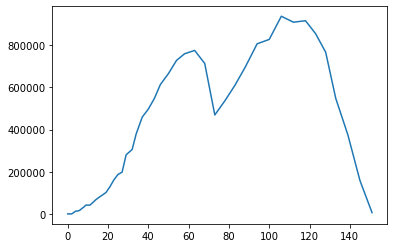

In [21]:
df.loc[:, 'size_Electrification_Level'].plot()

<AxesSubplot:>

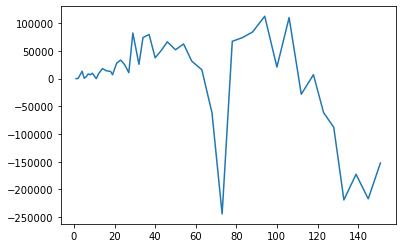

In [22]:
# 뭐지모르고쓰는코드
diff1 = df.loc[:, 'size_Electrification_Level'].diff(periods=1).iloc[1:]
diff1.plot()

(-3.6841814264071986, 0.004341239099350596, 0, 44, {'1%': -3.5885733964124715, '5%': -2.929885661157025, '10%': -2.6031845661157025}, 29.050608461092374)
-3.6841814264071986
0.004341239099350596


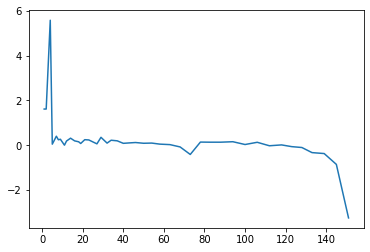

In [23]:
from statsmodels.tsa.stattools import adfuller

diff1 = np.log(df['size_Electrification_Level']).diff(periods=1).iloc[1:]
diff1.plot()
result = adfuller(diff1)
print(result)
print(result[0])
print(result[1])

In [24]:
# !pip install pmdarima

In [25]:
from pmdarima.arima import auto_arima
model = auto_arima(df['size_Electrification_Level'], suppress_warning=True)
model

ARIMA(order=(2, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [28]:
# 학습용, 검증용 구분
n = int(df.shape[0]*.8)
train = df[:n]
test = df[n:]
print(len(df['size_Electrification_Level']))
print(train['size_Electrification_Level'].values)
print(test['size_Electrification_Level'].values)

46
[     2     10     50  13198  13753  17063  25372  32180  41733  41560
  49740  67684  81705  94656 101596 129288 162638 187405 198045 280138
 305856 379857 459300 496780 547484 613727 665647 727973 759529 775378
 713473 469350 536543 610355 694421 806809]
[827543 937473 909237 916210 854752 766971 548027 375383 158449   6125]


In [29]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['size_Electrification_Level'], order=(0,1,0)).fit()

/Users/isc-yeon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/isc-yeon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/isc-yeon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [30]:
fore = model.forecast(steps=5)
print(fore)

36    806809.0
37    806809.0
38    806809.0
39    806809.0
40    806809.0
Name: predicted_mean, dtype: float64


/Users/isc-yeon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [53]:
# from statsmodels.graphics.tsaplots import plot_predict
# from statsmodels.tsa.arima.model import ARIMA

In [54]:
# from statsmodels.tsa.arima.model.ARIMAResults import plot_predict

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

dta = sm.datasets.sunspots.load_pandas().data[['SUNACTIVITY']]
dta.index = pd.date_range(start='1700', end='2009', freq='A')
res = ARIMA(dta, order=(0,2,0)).fit()
fig, ax = plt.subplots()
ax = dta.loc['1950':].plot(ax=ax)
plot_predict(res, '1990', '2012', ax=ax)
plt.show()

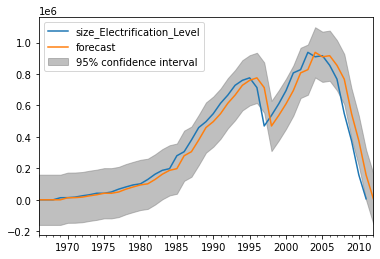

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

dta = df['size_Electrification_Level']
dta.index = pd.date_range(start='1966', end='2012', freq='A') # 시간인덱스??? 이상함 다시맞춰야됨
res = ARIMA(dta, order=(0,1,0)).fit()
fig, ax = plt.subplots()
ax = dta.loc['1966':].plot(ax=ax)
plot_predict(res, '1966', '2012', ax=ax)
plt.show()

In [ ]:
df['size_Electrification_Level'].index

Int64Index([  0,   1,   2,   4,   5,   6,   7,   8,   9,  11,  12,  14,  16,
             18,  19,  21,  23,  25,  27,  29,  32,  34,  37,  40,  43,  46,
             50,  54,  58,  63,  68,  73,  78,  83,  88,  94, 100, 106, 112,
            118, 123, 128, 133, 139, 145, 151],
           dtype='int64')

In [ ]:
df['size_Electrification_Level'].index = pd.DatetimeIndex(df['size_Electrification_Level'].index).to_period('Y')



In [ ]:
df['size_Electrification_Level'].index

PeriodIndex(['1970', '1970', '1970', '1970', '1970', '1970', '1970', '1970',
             '1970', '1970', '1970', '1970', '1970', '1970', '1970', '1970',
             '1970', '1970', '1970', '1970', '1970', '1970', '1970', '1970',
             '1970', '1970', '1970', '1970', '1970', '1970', '1970', '1970',
             '1970', '1970', '1970', '1970', '1970', '1970', '1970', '1970',
             '1970', '1970', '1970', '1970', '1970', '1970'],
            dtype='period[A-DEC]')

In [ ]:
# 다중 선형 회귀?
# 가치투자 - 실질적인 시장의 과거 반증을 봄으로써 특정 회사의 가치가 상승할 것으로 예측??? 

In [ ]:
# 지금 데이터 일반차량 + 전기차 통합 데이터이기 때문에
# 내연기관과 전기차량의 수요에 대한 시장의 반증을 볼수 있을까
# 앞으로의 Electrification Level 에 따른 추후 시장 demand 예측. 각각 타입에 따라 증감이 있을까
# 선형 회귀
# Y 수량, X는 기간 ?

In [ ]:
# 시계열 (X -> Model Year) 1966 ~ 2023
# 데이터 불균형이 심함?
# 전처리 우선 해보기 : 컬럼 2개 Year(연속형), ICE(연속형), Strong HEV(연속형) .... 
# 컬럼이 2개면 안되지 컬럼이 7개여야함
# 6주차 참고중이엇음... + 7, 10, 11 주차